# *DATA SCIENCE / SECTION 1* 프로젝트 설명서
---
<img src='https://cdn.cloudflare.steamstatic.com/steam/apps/239820/ss_3ecc65538ac4170f1855f089377baaa8001e5d68.1920x1080.jpg?t=1605506865' width='500'>

## 개요
엄성호님은 게임 회사의 데이터 팀에 합류했습니다.

> 다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

## 🕹️ Data Description
---
- `Name` : 게임의 이름입니다.
- `Platform` : 게임이 지원되는 플랫폼의 이름입니다.
- `Year` : 게임이 출시된 연도입니다.
- `Genre` : 게임의 장르입니다.
- `Publisher` : 게임을 제작한 회사입니다.
- `NA_Sales` : 북미지역에서의 출고량입니다.
- `EU_Sales` : 유럽지역에서의 출고량입니다.
- `JP_Sales` : 일본지역에서의 출고량입니다.
- `Other_Sales` : 기타지역에서의 출고량입니다.

## Goal of project
---
앞서 알려드린 것 처럼.

> 다음 분기에 어떤 게임을 설계해야 할까

를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.

데이터셋을 읽는 것 부터,

이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성하고,

해당 내용을 기반으로 설명하는 영상을 작성하는 것이

엄성호님이 이번 프로젝트 기간 동안 하셔야 하는 일입니다.

당연히 어떠한 코드, 분석, 라이브러리 혹은 목표를 가지는지는 온전히 엄성호님의 자유입니다.

그러나, Section 1 Project 인 만큼 해당 기간 동안 배운 내용을 위주로 설정하는 것이 권장됩니다.

아직 배우지 않은 Deep Learning을 사용하면 곤란하겠죠?

추가로, 엄성호님의 발표를 듣는 사람은 **비데이터 직군**이라 가정합니다.

즉 엄성호님의 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력하셔야 할 겁니다.

## Keywords (참조용)
---
Section 1때 배운 내용들은 다음과 같습니다.

- Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
- Sprint 2 : Hypothesis Test, CI, Bayesian, AB Test
- Sprint 3 : DR, PCA, Clustering, GD

## 반드시 들어가야 하는 내용.
---
앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

1. `지역에 따라서 선호하는 게임 장르가 다를까` 라는 질문에 대답을 하셔야합니다.
2. `연도별 게임의 트렌드가 있을까` 라는 질문에 대답을 하셔야합니다.
3. `출고량이 높은 게임에 대한 분석 및 시각화 프로세스`가 포함되어야 합니다.

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

## 기타
---
- 발표영상의 시간은 8분으로 제한합니다.
- 발표영상 촬영 방법은 다른 문서를 참조하세요.
- 가능한 코드에 커멘트를 달아주는 것이 권장되지만, 모든 코드 내용을 한줄 한줄 설명할 필요는 없습니다.
- 단, 내가 이런 분석을 했는데 이 부분은 꼭 설명하고 싶다, 라는 내용이 있으면 설명해도 좋습니다.

# Part 0. EDA & Data Wrangling

Exploratory Data Analysis


데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv', index_col=0)
display(df.shape)
display(df.info())
display(df.describe())
df

(16598, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


None

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


우선 결측치를 확인해보자

In [ ]:
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df[df.isna().any(1)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


데이터를 확인해보면 다음을 알 수 있다.
1. Year, Genre, Publisher에 결측치가 있음
2. Publisher에 'Unknown'이라는 값이 있음
3. 모든 Sales(판매량)에는 결측치가 없고 단위를 알수없는 숫자가 있음
4. Year이 정수가 아닌 실수로 되어있고, 100 이하인 값이 있음

이를 다음과 같이 처리할수 있다.
1. Year, Genre, Publisher에 결측치가 있음
 * Year 혹은 Genre에 결측치가 있을 경우, 제거함
 * Publisher는 중요하지 않으므로 결측치가 있어도 제거하지 않음
2. Publisher에 'Unknown'이라는 값이 있음
 * 마찬가지로 중요하지 않음
3. 모든 Sales(판매량)에는 결측치가 없고 단위를 알수없는 숫자가 있음
 * 가장많이 팔린 게임중 하나인 New Super Mario Bros. 값으로 추측할 수 있음
 * New Super Mario Bros.의 총판매량은 3079만장 내외라고함
 * 데이터에서 New Super Mario Bros.의 판매량은 대략 30임 (30000000 = 30M)
 * 즉, 표기되지 않은 단위가 Millon(백만) 임을 추측할 수 있음
 * 1M = 1000K
4. Year을 실수에서 정수로 변환
 * Year 100 이하인 값들을 검색해보니 앞자리가 생략된 것을 알 수 있음
 * Treasures of the Deep 1997년도 출시 97로 표기
 * Kung Fu Panda: Showdown of Legendary Legends	2015년도 출시 15로 표기

In [ ]:
df = df.dropna(how='any', subset=['Year', 'Genre'])

중복된 값이 있으면 제거해보자.

In [ ]:
df.duplicated().sum()

0

index를 다시 설정해주자

In [ ]:
df = df.reset_index(drop=True)

Year를 정수로 변환해주고 100이하인 데이터들을 처리해주자

In [ ]:
df['Year'] = df['Year'].astype(int)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
def Year_con(n):
  if n < 100 and n > 22:
    n += 1900
  elif n < 100 and n < 23:
    n += 2000
  return n

df['Year'] = df.Year.apply(Year_con)

Sales 열들단위를 통일해보자

In [ ]:
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0,0.01


In [ ]:
def rm_alpha(s):
  if s[-1] == 'M':
    n = pd.to_numeric(s[:-1])
  elif s[-1] == 'K':
    n = pd.to_numeric(s[:-1]) * 10**-3
  else:
    n = pd.to_numeric(s)
  return n

df['NA_Sales'] = df['NA_Sales'].apply(rm_alpha).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(rm_alpha).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(rm_alpha).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(rm_alpha).astype(float)

In [ ]:
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


In [ ]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  int64  
 3   Genre        16277 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16277 non-null  float64
 6   EU_Sales     16277 non-null  float64
 7   JP_Sales     16277 non-null  float64
 8   Other_Sales  16277 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


None

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000
mean,2006.407630,0.264964,0.147202,0.078111,0.048134
std,5.828646,0.821587,0.507802,0.308951,0.189480
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


## Featur Engineering

각 데이터에서 판매량을 모두 합친 열을 만들어주자

In [ ]:
df['Total_Sales'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16273,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16274,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16275,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# Part 1. 지역에 따라서 선호하는 게임 장르가 다를까?

가지고 있는 데이터에서 장르별 판매량을 볼 수 있다.

이 데이터를 바탕으로 지역별 장르 선호도를 나타낼 수 있다.

In [ ]:
df1 = df.groupby('Genre').sum()
df1

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,6509645,858.78,513.64,156.61,183.99,1713.02
Adventure,2550324,101.92,63.71,51.89,16.70,234.22
Fighting,1673860,220.35,99.90,87.14,36.15,443.54
Misc,3422377,400.29,210.20,104.18,72.74,787.41
Platform,1751333,445.38,200.65,130.53,51.45,828.01
Puzzle,1136973,121.58,50.48,56.24,12.44,240.74
Racing,2445913,354.70,235.03,56.32,76.51,722.56
Role-Playing,2942353,318.76,183.10,342.93,56.73,901.52
Shooter,2567579,574.48,310.23,38.18,101.86,1024.75


In [ ]:
df1 = df1.drop(columns='Year')
df1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,858.78,513.64,156.61,183.99,1713.02
Adventure,101.92,63.71,51.89,16.70,234.22
Fighting,220.35,99.90,87.14,36.15,443.54
Misc,400.29,210.20,104.18,72.74,787.41
Platform,445.38,200.65,130.53,51.45,828.01
Puzzle,121.58,50.48,56.24,12.44,240.74
Racing,354.70,235.03,56.32,76.51,722.56
Role-Playing,318.76,183.10,342.93,56.73,901.52
Shooter,574.48,310.23,38.18,101.86,1024.75


In [ ]:
df1['NA_Sales'] = df1['NA_Sales'] / df1['NA_Sales'].sum()
df1['EU_Sales'] = df1['EU_Sales'] / df1['EU_Sales'].sum()
df1['JP_Sales'] = df1['JP_Sales'] / df1['JP_Sales'].sum()
df1['Other_Sales'] = df1['Other_Sales'] / df1['Other_Sales'].sum()
df1['Total_Sales'] = df1['Total_Sales'] / df1['Total_Sales'].sum()

In [ ]:
df1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,0.199123,0.214374,0.123177,0.234840,0.195467
Adventure,0.023632,0.026590,0.040813,0.021315,0.026726
Fighting,0.051092,0.041694,0.068538,0.046141,0.050611
Misc,0.092814,0.087730,0.081940,0.092843,0.089849
Platform,0.103269,0.083744,0.102665,0.065669,0.094482
Puzzle,0.028190,0.021068,0.044234,0.015878,0.027470
Racing,0.082243,0.098093,0.044297,0.097655,0.082449
Role-Playing,0.073910,0.076419,0.269722,0.072409,0.102870
Shooter,0.133203,0.129478,0.030029,0.130011,0.116931


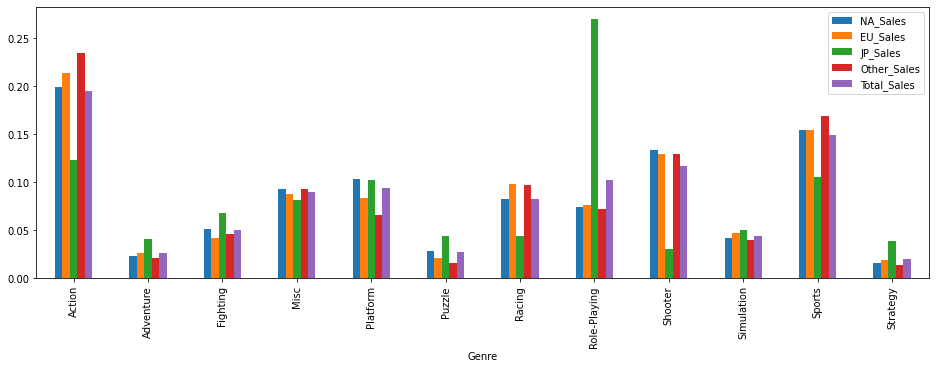

In [ ]:
fig, ax = plt.subplots(facecolor='white')
df1.plot(kind="bar", figsize=(16, 5), ax=ax)

JP_Sales(일본 판매량)만 Role-Playing이 판매량이 높고 Action, Shooter의 판매량이 낮은 것을 알 수 있다.

나머지 지역들은 선호하는 장르의 차이가 미미하다.

만약 일본시장을 노리고 게임을 설계한다면 RPG를 설계해야 한다

그 외의 시장이나 글로벌 출시할 계획이라면 장르는 큰 의미가 없다

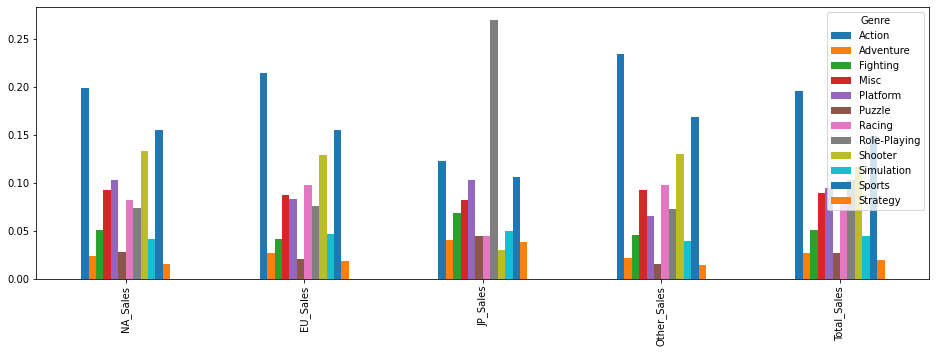

In [ ]:
fig, ax = plt.subplots(facecolor='white')
df1.T.plot(kind="bar", figsize=(16, 5), ax=ax)

# Part 2. 연도별 게임의 트렌드가 있을까?

장르의 판매량을 누적해서 연도별로 가장많이 팔린 장르를 알아보자

In [ ]:
df2 = df.groupby(['Year', 'Genre']).sum()
df2

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Year Genre                                                               
1980 Action            0.32      0.02      0.00         0.00         0.34
     Fighting          0.72      0.04      0.00         0.01         0.77
     Misc              2.53      0.15      0.00         0.02         2.70
     Shooter           6.56      0.43      0.00         0.08         7.07
1981 Action           13.86      0.81      0.00         0.12        14.79
...                     ...       ...       ...          ...          ...
2016 Sports            4.57      7.36      0.78         1.92        14.63
     Strategy          0.11      0.32      0.05         0.04         0.52
2017 Action            0.00      0.00      0.01         0.00         0.01
     Role-Playing      0.00      0.00      0.04         0.00         0.04
2020 Simulation        0.27      0.00      0.00         0.02         0.29

[388 rows x 5 columns]

In [ ]:
idx = df2.groupby('Year')['Total_Sales'].idxmax() 
trends = df2.loc[idx]
trends

,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,Genre,,,,,
1980,Shooter,6.56,0.43,0.00,0.08,7.07
1981,Action,13.86,0.81,0.00,0.12,14.79
1982,Puzzle,9.35,0.58,0.00,0.11,10.04
1983,Platform,2.80,0.43,3.62,0.08,6.93
1984,Shooter,27.79,0.85,1.96,0.50,31.10
1985,Platform,29.93,3.77,8.67,0.80,43.17
1986,Action,6.52,1.66,5.31,0.25,13.74
1987,Fighting,2.80,0.65,1.87,0.10,5.42
1988,Platform,16.34,4.99,5.70,0.70,27.73


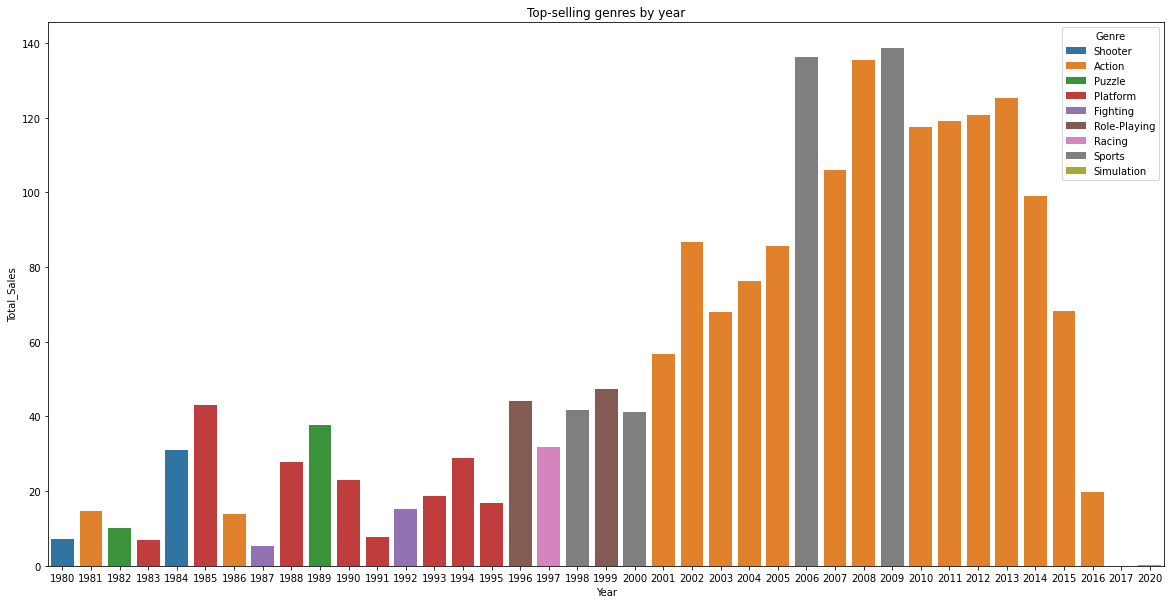

In [ ]:
plt.figure(figsize=(20,10), facecolor='white')
g = sns.barplot(x='Year', y='Total_Sales', hue='Genre', dodge=False, data=trends.reset_index())
g.set_title('Top-selling genres by year')
plt.show()

2000년 이후 누적판매량이 가장 많은 장르는 Action이다

# Part 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

2000년 이후로 출고량이 가장 많은 게임 Top 250을 살펴보자

In [ ]:
df3 = df[df['Year'] > 2000].sort_values('Total_Sales', ascending=False).iloc[:250, :].reset_index(drop=True)
df3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
...,...,...,...,...,...,...,...,...,...,...
245,The Sims: Unleashed,PC,2002,Simulation,Electronic Arts,2.03,1.56,0.00,0.17,3.76
246,Harry Potter and the Sorcerer's Stone,PS,2001,Action,Electronic Arts,1.37,2.00,0.14,0.22,3.73
247,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,Namco Bandai Games,0.96,2.00,0.21,0.56,3.73
248,MySims,DS,2007,Simulation,Electronic Arts,1.59,1.61,0.08,0.41,3.69


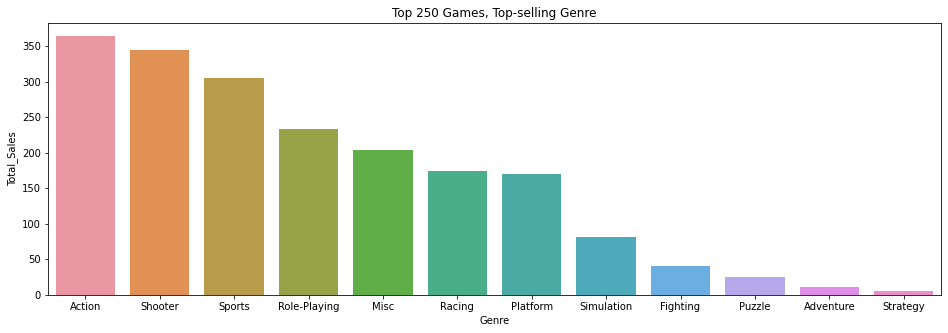

In [ ]:
df3.groupby('Genre').sum().sort_values('Total_Sales', ascending=False)
plt.figure(figsize=(16,5), facecolor='white')
g = sns.barplot(x='Genre', y='Total_Sales', data=df3.groupby('Genre').sum().sort_values('Total_Sales', ascending=False).reset_index())
g.set_title('Top 250 Games, Top-selling Genre')
plt.show()

Top 250 게임들에서 가장 많이 팔린 장르는 Action, Shooter, Sports

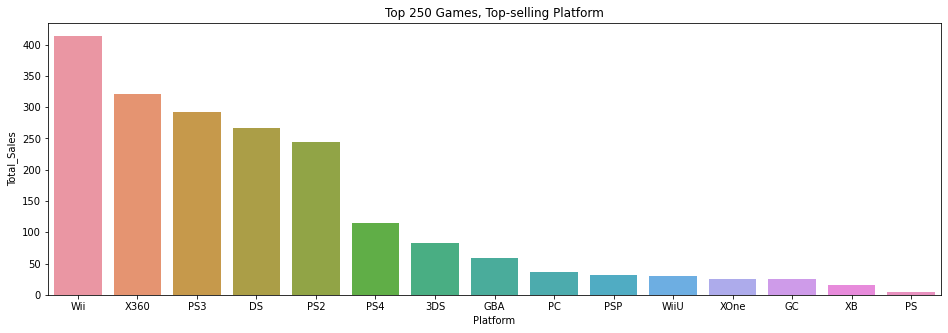

In [ ]:
df3.groupby('Platform').sum().sort_values('Total_Sales', ascending=False)
plt.figure(figsize=(16,5), facecolor='white')
g = sns.barplot(x='Platform', y='Total_Sales', data=df3.groupby('Platform').sum().sort_values('Total_Sales', ascending=False).reset_index())
g.set_title('Top 250 Games, Top-selling Platform')
plt.show()

Top 250 게임들에서 가장 많이 팔린 플랫폼은 Wii, X360, PS3

그렇다면 Wii로 개발하는게 최선인가?

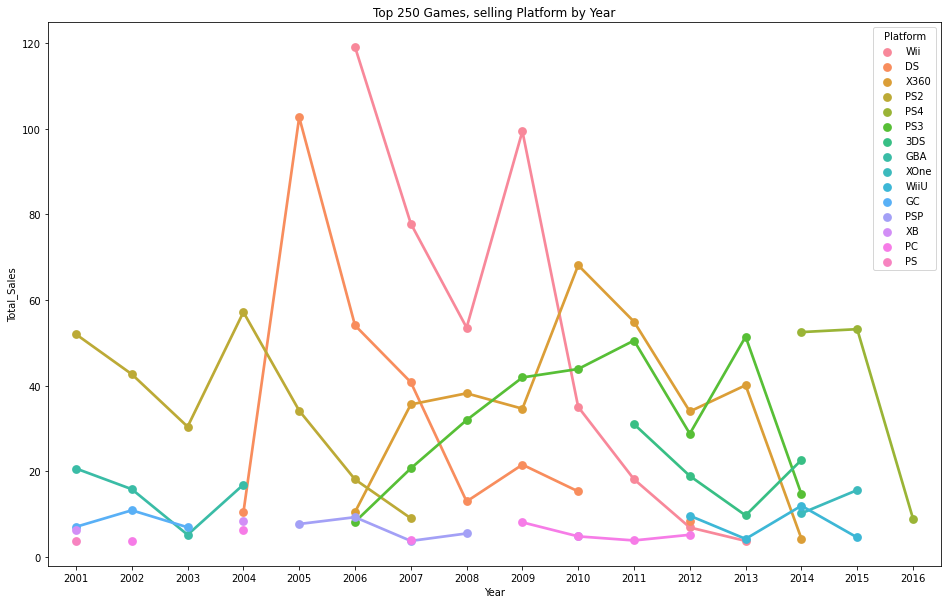

In [ ]:
plt.figure(figsize=(16,10), facecolor='white')
g = sns.pointplot(x="Year", y="Total_Sales", hue='Platform', kind="point", data=df3.groupby(['Year', 'Platform']).sum().sort_values('Total_Sales', ascending=False).reset_index())
g.set_title('Top 250 Games, selling Platform by Year')
plt.show()

2015년까지 살펴보면 Wii는 물론 대부분의 플랫폼이 시간이 지나면서 판매량이 줄어든다.

2015년을 기준으로한다면 최신플랫폼인 PS4를 사용하는게 판매량이 높을 것이다.

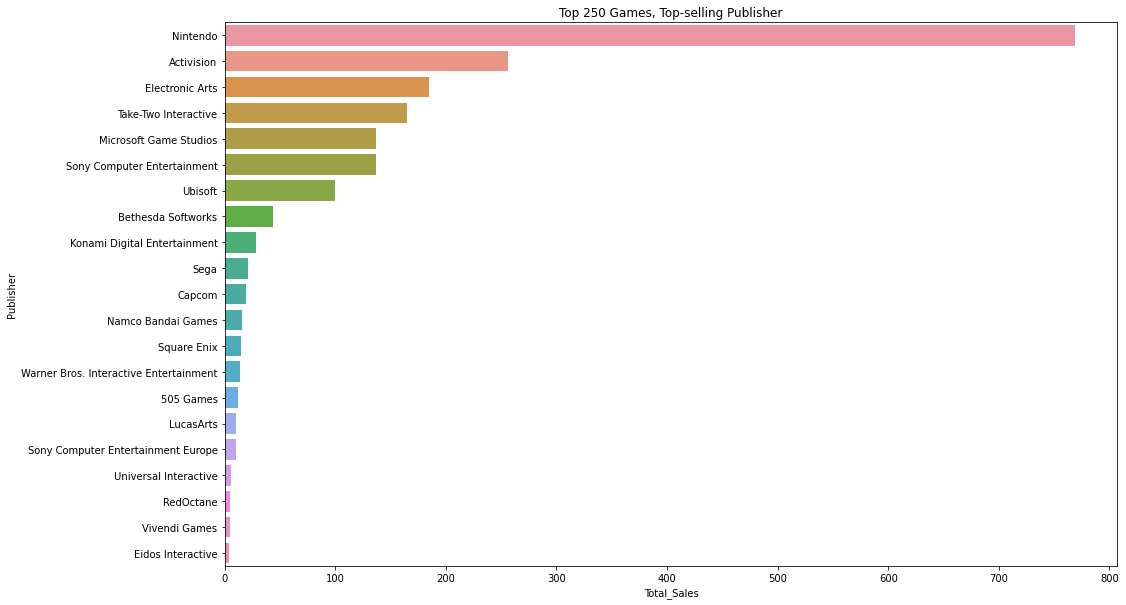

In [ ]:
df3.groupby('Publisher').sum().sort_values('Publisher', ascending=False)
plt.figure(figsize=(16,10), facecolor='white')
g = sns.barplot(x='Total_Sales', y='Publisher', data=df3.groupby('Publisher').sum().sort_values('Total_Sales', ascending=False).reset_index())
g.set_title('Top 250 Games, Top-selling Publisher')
plt.show()

# Part 4. 다음 분기에 어떤 게임을 설계해야 할까?

다음 분기에 게임을 설계한다면 3가지를 고려해 볼 수 있다.
1. 플랫폼
2. 장르
3. 판매대상 지역
---
1. 플랫폼
 * 플랫폼은 PS4(2015년 기준 최신 플랫폼) 혹은 현재 최신 플랫폼으로 개발한다
2. 장르
 * 전체 판매량으로 봐도, Top 250 Games를 봐도 Action이 가장 많은 판매량을 보인다.
 * RPG 개발에 자신이 있다면 일본시장을 목표로 하면 좋은 판매량이 나올 수도 있다.
 * Top 250 Games에서 가장 잘 팔린 장르는 Action>Shooter>Sports 순이다.
3. 판매대상 지역
 * 만약 일본시장을 목표로 만든다면 RPG 장르로 만드는 것이 유리하다.
 * 글로벌시장을 목표로 한다면 장르에 영향을 받지 않는다.
4. 추가로 고려할 사항
 * Nintendo는 Top 250 Games 에서도 압도적인 판매량을 보이는 퍼블리셔이므로 Nintendo의 강점과 흥행의 이유를 배우면 좋을 것이다.
 * 제한사항이 없다면 글로벌시장, PS4, 액션게임을 만드는게 좋은 판매량을 기대할 수 있다. 